In [1]:
import pytensor
import pytensor.tensor as pt
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import sunode

sunode.__version__


'0.4.0'

In [2]:

x = pt.scalar(name="x")
y = pt.vector(name="y",shape=(4,))

print(
    f"""
x type: {x.type}
x name = {x.name}
---
y type: {y.type}
y name = {y.name}
"""
)
print(y.shape)




x type: TensorType(float64, ())
x name = x
---
y type: TensorType(float64, (4,))
y name = y

TensorConstant{(1,) of 4}


In [3]:
print(y[5])

Subtensor{int64}.0


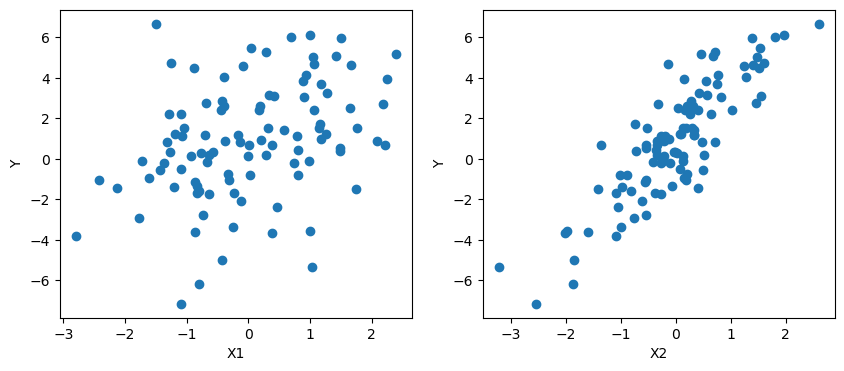

<Figure size 640x480 with 0 Axes>

In [4]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(123)

alpha=1
sigma=1
beta =[1, 2.5]

N=100

X1=np.random.randn(N)
X2=np.random.randn(N)

Y=alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(N)*sigma

%matplotlib inline
fig1,ax1 = plt.subplots(1, 2, figsize=(10,4));
ax1[0].scatter(X1, Y);ax1[0].set_xlabel('X1');ax1[0].set_ylabel('Y'); 
ax1[1].scatter(X2, Y);ax1[1].set_xlabel('X2');ax1[1].set_ylabel('Y');

fig2 = plt.figure(2);
ax2 = Axes3D(fig2);
ax2.scatter(X1,X2,Y);
ax2.set_xlabel('X1');
ax2.set_ylabel('X2');
ax2.set_zlabel('Y');

basic_model = pm.Model()
with basic_model:
    alpha=pm.Normal('alpha',mu=0,sigma=10)
    beta=pm.Normal('beta',mu=0,sigma=10,shape=2)
    sigma=pm.HalfNormal('sigma',sigma=1)

    mu=alpha+beta[0]*X1+beta[1]*X2

    Y_obs=pm.Normal('Y_obs',mu=mu,sigma=sigma,observed=Y)

In [8]:
with basic_model:
    trace = pm.sample(2000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


In [9]:
import arviz as az
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.906,0.099,0.726,1.102,0.001,0.001,12371.0,6044.0,1.0
beta[0],0.949,0.087,0.782,1.106,0.001,0.001,14079.0,6405.0,1.0
beta[1],2.523,0.102,2.331,2.713,0.001,0.001,11065.0,6215.0,1.0
sigma,0.990,0.071,0.857,1.122,0.001,0.000,13208.0,6663.0,1.0
